# Titanic Competition on Kaggle

This is my submission for the titanic competition on Kaggle. It contains not only the ML model, but data science methods and analysis methods to better understand the dateset.

## Step 0: Explore the Dataset

In [340]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# Get some basic information about the data
df = pd.read_csv('../Data/titanic/train.csv')
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1: Data Cleaning and Wrangling
Let's look at our data to see how complete/incomplete it is.

In [342]:
# Get null count for each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It is missing over 687 entries for the Cabin Column. Out of 891 rows, thats about 77% of our data set. Perhaps it's best if we remove it. The age category missing about 8.6%. 

Next, we should consider which columns, or features, actually have an impact on the survival rate. We can do this through some visualizations.

## Step 2: EDA and Data Visualization

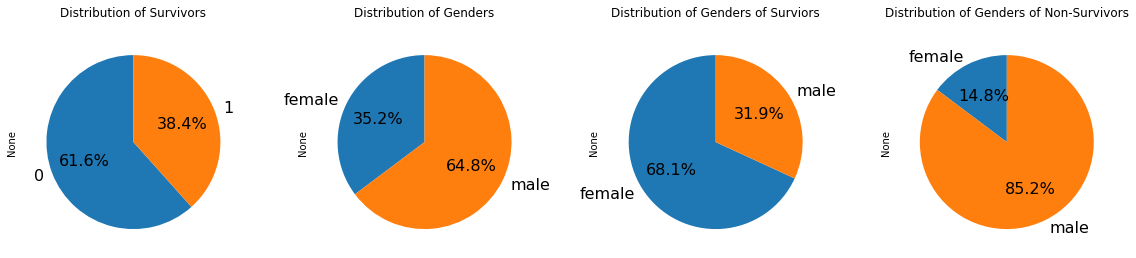

In [343]:
# Basic plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.set_facecolor('white')

# Distribution of Survivors
survived = df.groupby('Survived').size()
ax0 = survived.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, fontsize=16)
ax0.set_title('Distribution of Survivors', y=1.05)


# Distribution of Gender
gender = df.groupby('Sex').size()
ax1 = gender.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, fontsize=16)
ax1.set_title('Distribution of Genders', y=1.05)

# Distribution of Genders by Survivors
gender_survive = df[df['Survived'] == 1].groupby(by='Sex').size()
ax2 = gender_survive.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', startangle=90, fontsize=16)
ax2.set_title('Distribution of Genders of Surviors', y=1.05)

gender_survive = df[df['Survived'] == 0].groupby(by='Sex').size()
ax3 = gender_survive.plot(kind='pie', ax=axes[3], autopct='%1.1f%%', startangle=90, fontsize=16)
ax3.set_title('Distribution of Genders of Non-Survivors', y=1.05)

plt.show()

It is clear to see that a large part of the surviving population were female. At the same time, a huge majority of non-survivors were male.

Text(0.5, 1.05, 'Distribution of Ages')

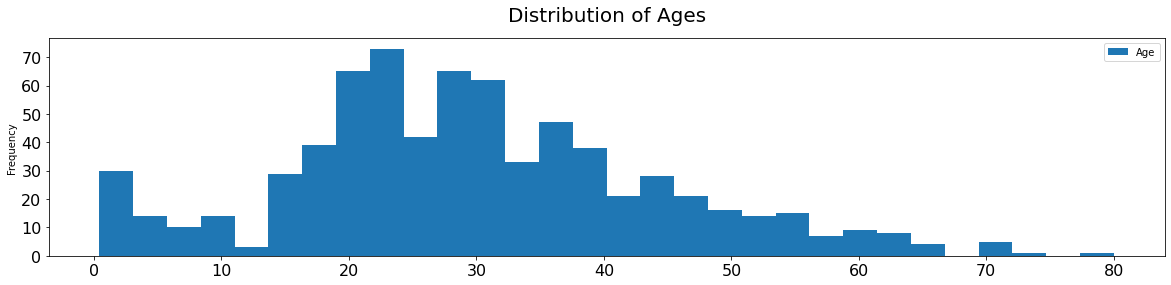

In [344]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

age_distro = df[['Age']]
ax0 = age_distro.plot(kind='hist', ax=axes, bins=30, fontsize=16)
ax0.set_title('Distribution of Ages', fontsize=20, y=1.05)

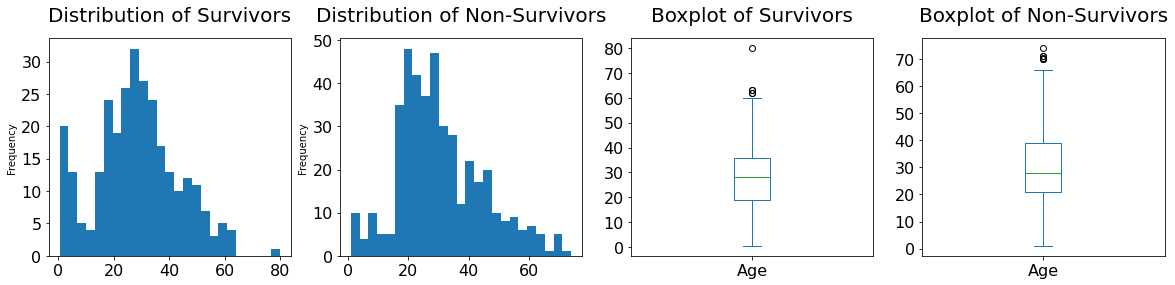

In [345]:
# Basic plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.set_facecolor('white')

# Distribution of the Age of Survivors and Non-Survivors
age_distro = df[(df['Age'] != None) & (df['Survived'] == 1)]['Age']
ax0 = age_distro.plot(kind='hist', x='Age', ax=axes[0], bins=25, fontsize=16)
ax0.set_title('Distribution of Survivors', fontsize=20, y=1.05)

a2 = age_distro.plot(kind='box', ax=axes[2], fontsize=16)
a2.set_title('Boxplot of Survivors', fontsize=20, y=1.05)


age_distro = df[(df['Age'] != None) & (df['Survived'] == 0)]['Age']
ax1 = age_distro.plot(kind='hist', x='Age', ax=axes[1], bins=25, fontsize=16)
ax1.set_title('Distribution of Non-Survivors', fontsize=20, y=1.05)

a3 = age_distro.plot(kind='box', ax=axes[3], fontsize=16)
a3.set_title('Boxplot of Non-Survivors', fontsize=20, y=1.05)

plt.show()

We can notice that that the average age of survivors is lower than those of non-survivors. Specifically we can see that most children (age less than 18), survive the titanic.

It seems that woman and younger children had the highest rate of surviving. This suggests that `Age` and `Sex` play a large role the probability of survival for an individual.

/Users/georgeli/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


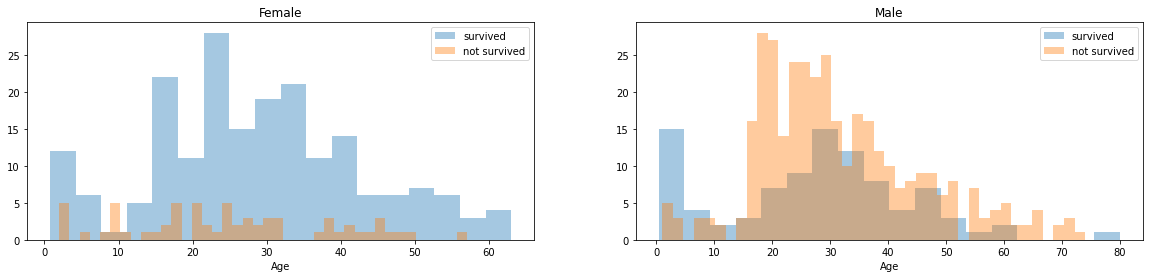

In [346]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))


women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<AxesSubplot:title={'center':'Pclass Distribution'}, xlabel='Pclass'>

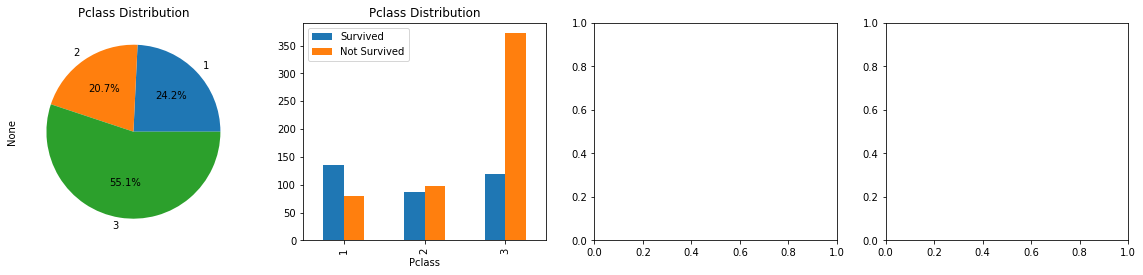

In [347]:
# Let look at some other columns
print(df.columns.values)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

pclass = df.groupby('Pclass').size()
pclass.plot(kind='pie', ax=axes[0], title='Pclass Distribution', autopct='%1.1f%%')

pclass_survived = df[df['Survived'] == 1].groupby('Pclass').size()
pclass_not_survived = df[df['Survived'] == 0].groupby('Pclass').size()
data = pd.DataFrame({'Survived': pclass_survived, 'Not Survived': pclass_not_survived})
data.plot(kind='bar', ax=axes[1], stacked=False, title='Pclass Distribution')

It seems that individuals of `Pclass` 1 are much more like to survive.

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


<AxesSubplot:title={'center':'Embarked'}, ylabel='None'>

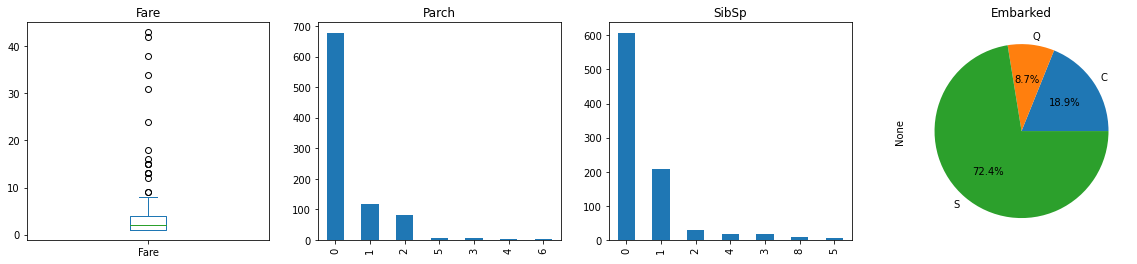

In [348]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Fare
fare = df['Fare'].value_counts()
print(fare)
fare.plot(kind='box', ax=axes[0], title='Fare')

# SibSp - # of siblings / spouses aboard the Titanic
sibsp = df['SibSp'].value_counts()
sibsp.plot(kind='bar', ax=axes[2], title='SibSp')

# Parch - # of parents / children aboard the Titanic
parch = df['Parch'].value_counts()
parch.plot(kind='bar', ax=axes[1], title='Parch')


# Embarked - # Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
embarked = df.groupby('Embarked').size()
embarked.plot(kind='pie', ax=axes[3], autopct='%1.1f%%', title='Embarked')

Let's do a more detailed analysis to see how these factors might affect survivability.

Text(0.5, 0.98, 'Factors Correlating with Survival')

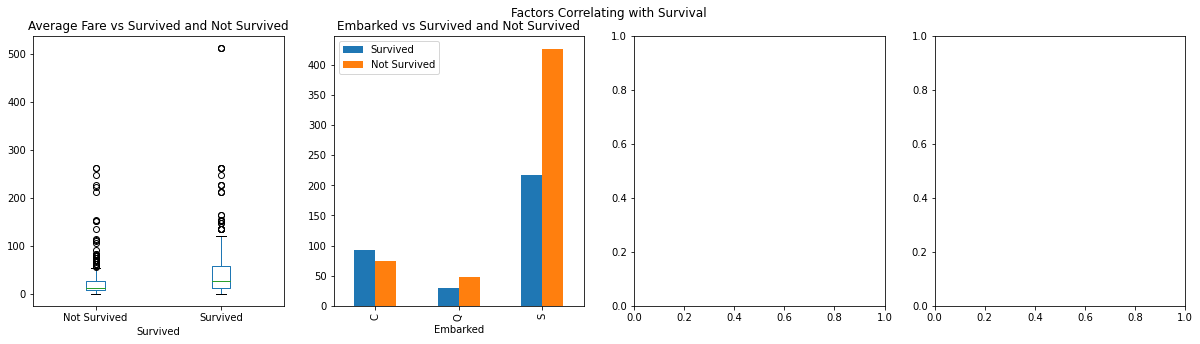

In [349]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Average Fare vs Survived and Not Survived
ax1 = df.boxplot(column='Fare', by='Survived', grid=False, ax=axes[0])
ax1.set_title("Average Fare vs Survived and Not Survived")
ax1.set_xlabel('Survived')
ax1.set_xticklabels(['Not Survived', 'Survived'])

# Embarked vs Survived and Not Survived
embarked_survived = df[df['Survived'] == 1].groupby('Embarked').size()
embarked_not_survived = df[df['Survived'] == 0].groupby('Embarked').size()
data = pd.DataFrame({'Survived': embarked_survived, 'Not Survived': embarked_not_survived})
ax2 = data.plot(kind='bar', stacked=False, ax=axes[1], title='Embarked vs Survived and Not Survived')

plt.suptitle("Factors Correlating with Survival")



It seams that those with a higher Fare price (maybe suggesting wealthier) have a higher probability of survivability.

## Step 4: Machine Learning and Predictions
### 4.1 Data Preperation
There is still a bit of data cleaning/wrangling to be done to prepare our data for machine learning models. First let's remove `Ticket`, `'Name`, and `Cabin`, as they are hard to classify numerically. (But we can find a way to incorprate them later)

Let's load them both

In [350]:
df_train = df
df_test = pd.read_csv("../Data/titanic/test.csv")

# We should also merge the test set answers

drop_cols = ["PassengerId", "Ticket", "Name", "Cabin"]
df_test_passenger_id =df_test['PassengerId']
df_train = df_train.drop(drop_cols, axis=1)
df_test = df_test.drop(drop_cols, axis=1)

Let's see if our testing dataset has some missing values

In [351]:
print(df_test.isnull().sum())
df_test.head()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Next, we should prepare the columns to account for missing values, then lets turn categorical values to numerical values.

In [352]:
data = [df_train, df_test]

# Map Genders
genders = {"male": 0, "female": 1}
for dataset in data:
   dataset['Sex'] = dataset['Sex'].map(genders)
   
# Map Embarked
common_value = 'S' # fill out missing embarked
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

ports = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
    
# Map Age to Age Group
# Fill in missing ages
for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)

# Create age groups   
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


# Map Fare to Fare Group
# Fill in missing fares
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# Create fare groups
qcut = pd.qcut(df_train['Fare'], 4)
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
print(df_train.head())
print(df_test.head())


   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    0    2      1      0     0         0
1         1       1    1    5      1      0     3         1
2         1       3    1    3      0      0     0         0
3         1       1    1    5      1      0     3         0
4         0       3    0    5      0      0     1         0
   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       3    0    2      0      0     0         2
1       3    1    5      1      0     0         0
2       2    0    3      0      0     1         2
3       3    0    5      0      0     1         0
4       3    1    5      1      1     1         0


### 4.2 Machine Learning Models
Let's run a couple of a Machine Learning Models, including
    1. Logistic Regression
    2. K Nearest Neighbors
    3. Decision Tree Classifier

In [353]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


X_train = df_train.drop("Survived", axis=1) # features
Y_train = df_train["Survived"]              # target
X_test  = df_test # test set

<AxesSubplot:>

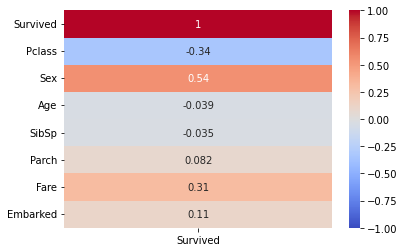

In [360]:
# Pearson Correlation
pearson_corr = df_train.corr()['Survived']
sns.heatmap(pearson_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

In [354]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

# Calculated accuracy is rounded to two decimal places
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

# Output to CSV
results = pd.DataFrame({'PassengerId': df_test_passenger_id, 'Survived': Y_pred})
results.to_csv('logistic_regression_results.csv', index=False)

80.25


In [357]:
# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

# Output to CSV
results = pd.DataFrame({'PassengerId': df_test_passenger_id, 'Survived': Y_pred})
results.to_csv('knn_results.csv', index=False)

87.09


In [356]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

90.91


### 4.3 Analysis
The accuracy of these models are:

**Logistic Regression**: 

**Decision Tree**

**K Nearest Neighbor**

Remember, the `score()` method of the trained logistic regression model is used to calculate the accuracy of the model on the training data (`X_train` and `Y_train`). So this may not reflext accuracy on unseen data, which is our `test.csv`

## Step 5: Conclusion
This is my first Kaggle Competition submission. I hope to learn more and more Data Science, Machine Learning, and Neural Network skills to get better insight about data as well as perform analytics and predictions on the given data for new, unseen data.

Any tips or suggestions are appreciated!
